# Assignment 1

First we need to import a few modules, execute the cell below:

In [15]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [16]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return np.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [17]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [18]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [19]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return np.sin(x)*(-1)

In [20]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [21]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [22]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x)-f(x-dx))/dx

In [23]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0,0.5,'analytical derivative - numerical derivative')

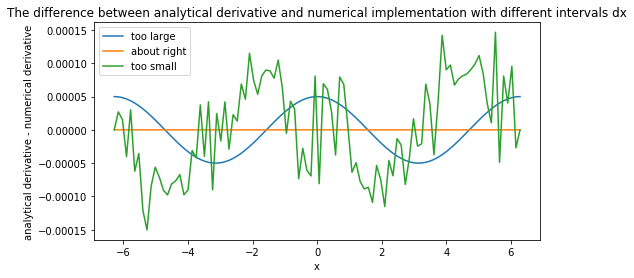

In [32]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-7)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label='too large')
plt.plot(xs, df_dx_2 - df_dx_analytical, label='about right')
plt.plot(xs, df_dx_3 - df_dx_analytical, label='too small')
plt.title("The difference between analytical derivative and numerical implementation with different intervals dx")
plt.legend()
plt.xlabel("x")
plt.ylabel("analytical derivative - numerical derivative")

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


The computer can only store a certain number of digits for each value. Performing calculations with these values gives results that have some undetermined digits, and these have to be made up by the computer. It cannot determine the right digits for all results and these made up digits are what causes the fluctuations shown in the plot above. When the interval dx is too small, the information lost through calculation is of a higher order (10^-5 for example) and so the resulting plot is seemingly random like the green plot above. However, when the interval dx is too large, the commputer still loses some information for each value, but this information is of a lower order (10^-10 for example) and so is much less significant which gives the smooth cosine curve above.